## [1] Data Overviewing

### 1.1) importing modules and reading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
data=pd.read_excel("/content/student_helthcare_dataset_train.xlsx")

In [ ]:
data_test=pd.read_excel("/content/student_helthcare_dataset_test.xlsx")

### 1.2) Training Data Overviewing

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal


<font size='5'> **Data Description :** </font>

- **Name** : The name of the patient associated with the healthcare record.

- **Age** : The age of the patient at the time of admission is expressed in years.
- **Gender** : The gender of the patient, either `Male` or `Female`.

- **Blood Type** : The patient's blood type, which can be one of the common blood types (e.g., A+, O-, etc.).

- **Medical Condition** : Specifies the primary medical condition or diagnosis associated with the patient, such as `Diabetes`, `Hypertension`, `Asthma`, and more.

- **Date of Admission** : The date on which the patient was admitted to the healthcare facility.

- **Doctor** : The name of the doctor responsible for the patient's care during their admission.

- **Hospital** : The healthcare facility or hospital where the patient was admitted.

- **Insurance Provider** : The patient's insurance provider, which can be one of several options, including `Aetna`, `Blue Cross`, `Cigna`, `UnitedHealthcare`, and `Medicare`.

- **Billing Amount** :The amount of money billed for the patient's healthcare services during their admission.

- **Room Number** : The room number where the patient was accommodated during their admission.

- **Admission Type** : The type of admission, which can be `Emergency`, `Elective`, or `Urgent`, reflecting the circumstances of the admission.

- **Discharge Date** : The date on which the patient was discharged from the healthcare facility.

- **Medication** : a medication prescribed or administered to the patient during their admission. Examples include `Aspirin`, `Ibuprofen`, `Penicillin`, `Paracetamol`, and `Lipitor`.


- **Test Results** : the results of a medical test conducted during the patient's admission.

- - -

Determining the dimensions of the dataset by retrieving the count of rows and columns.

In [ ]:
data.shape

(6050, 15)

- Our Training Dataset consists of **```6050 rows```** and **```15 columns```**.

Obtaining insightful information regarding the dataset's attributes and their characteristics.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6050 non-null   object 
 1   Age                 6050 non-null   int64  
 2   Gender              6050 non-null   object 
 3   Blood Type          6050 non-null   object 
 4   Medical Condition   6041 non-null   object 
 5   Date of Admission   6050 non-null   object 
 6   Doctor              6050 non-null   object 
 7   Hospital            6050 non-null   object 
 8   Insurance Provider  6050 non-null   object 
 9   Billing Amount      6050 non-null   float64
 10  Room Number         6050 non-null   int64  
 11  Admission Type      6050 non-null   object 
 12  Discharge Date      6050 non-null   object 
 13  Medication          6042 non-null   object 
 14  Test Results        6050 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 709.1

**Observations:**

* The majority of our dataset columns are categorical and are stored as objects.

*  There are a few null values present in two columns.

* The two columns that represent dates **```Date of Admission```** and **```Discharge Date ```** are currently stored as object types, suggesting the need for further conversion to datetime format.

Transforming columns containing date representations into datetime format to enable flexible datetime manipulation.

In [ ]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

Verifying the data types again to confirm the successful conversion of datetime.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                6050 non-null   object        
 1   Age                 6050 non-null   int64         
 2   Gender              6050 non-null   object        
 3   Blood Type          6050 non-null   object        
 4   Medical Condition   6041 non-null   object        
 5   Date of Admission   6050 non-null   datetime64[ns]
 6   Doctor              6050 non-null   object        
 7   Hospital            6050 non-null   object        
 8   Insurance Provider  6050 non-null   object        
 9   Billing Amount      6050 non-null   float64       
 10  Room Number         6050 non-null   int64         
 11  Admission Type      6050 non-null   object        
 12  Discharge Date      6050 non-null   datetime64[ns]
 13  Medication          6042 non-null   object      

Generating descriptive statistics for numerical columns.

In [ ]:
data.describe()

,Age,Billing Amount,Room Number
count,6050.000000,6.050000e+03,6050.000000
mean,51.429752,2.158714e+04,300.270744
std,19.553034,2.940994e+05,118.031170
min,18.000000,-2.282298e+07,-492.000000
25%,35.000000,1.317240e+04,198.000000
50%,52.000000,2.507342e+04,300.500000
75%,68.000000,3.771203e+04,402.000000
max,85.000000,1.426107e+05,500.000000


**Observations:**
* The minmium values of Billing amount and room number is of negative values, which indicates an error that we can consider further.

Generating descriptive statistics for categorical columns.

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Name,6050,5798,Joseph Smith,4
Gender,6050,2,Female,3049
Blood Type,6050,8,A-,776
Medical Condition,6041,6,Cancer,1048
Doctor,6050,5825,James Williams,4
Hospital,6050,5425,Smith and Sons,12
Insurance Provider,6050,5,Cigna,1266
Admission Type,6050,3,Urgent,2065
Medication,6042,5,Penicillin,1258
Test Results,6050,2,Abnormal,3099


**Observations:**
* The Most Repeated Gender is Female.
* The Most Repeated Blood Type is A-.
* The Most Repeated Medical Condition is Cancer.


### 1.3) Exploratory Data Analysis

Displaying the count of unique **`Names`** present within the dataset.

In [ ]:
data['Name'].nunique()

5798

- There are some Names repeated.

Displaying the occurrence for each **`Name`**.

In [ ]:
data['Name'].value_counts()

Joseph Smith         4
Amanda Lee           4
John Johnson         4
John Smith           4
Jessica Martinez     3
                    ..
Jennifer Houston     1
Linda Robinson       1
Bridget Velazquez    1
Joshua Jackson       1
Angel Davis          1
Name: Name, Length: 5798, dtype: int64

Display the Repeated **`Names`** to ensure that they are not duplicates.

In [ ]:
data[(data['Name']=='Joseph Smith') | (data['Name']=='Amanda Lee')]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
138,Amanda Lee,71,Female,A-,Diabetes,2020-02-12,Brenda Burton,"Bass, Larson and Williams",UnitedHealthcare,17166.802114,181,Elective,2020-03-06,Penicillin,Abnormal
480,Joseph Smith,20,Male,O-,Cancer,2023-01-29,Amanda Stout,Carlson-Quinn,Blue Cross,2397.243373,193,Urgent,2023-02-02,Paracetamol,Normal
1595,Amanda Lee,76,Female,O+,Asthma,2020-11-16,Pamela Poole,Moore and Sons,Medicare,48634.284895,352,Elective,2020-12-06,Ibuprofen,Normal
2148,Amanda Lee,81,Male,A+,Arthritis,2021-03-06,Victoria Moreno,"Morales, Harmon and Arnold",Blue Cross,31829.563417,192,Emergency,2021-03-25,Aspirin,Normal
4543,Amanda Lee,50,Female,AB+,Asthma,2019-06-14,Whitney Turner,"Lopez, Smith and Sherman",UnitedHealthcare,41920.049677,152,Elective,2019-07-08,Aspirin,Normal
5016,Joseph Smith,30,Male,O+,Diabetes,2019-12-27,Rachel Baker,Archer Ltd,Blue Cross,7843.407417,494,Emergency,2020-01-01,Lipitor,Abnormal
5019,Joseph Smith,18,Male,A+,Obesity,2023-08-24,Tanya Mccarty,Graves Inc,Medicare,13046.980254,350,Elective,2023-08-30,Ibuprofen,Abnormal
5809,Joseph Smith,64,Female,O+,Asthma,2020-01-09,Michele Ruiz,"Green, Robertson and Lindsey",Medicare,3621.536450,392,Emergency,2020-01-26,Lipitor,Abnormal


- They are differnent people with the same name.

Validating the unique values within the **`Age`**  column to ensure the absence of incorrect or erroneous entries.

In [ ]:
data['Age'].unique()

array([35, 61, 49, 51, 41, 82, 55, 33, 39, 45, 72, 79, 54, 26, 70, 74, 56,
       37, 81, 78, 83, 30, 34, 48, 60, 57, 19, 21, 68, 42, 71, 28, 84, 32,
       66, 43, 69, 27, 73, 67, 80, 44, 38, 85, 64, 47, 59, 65, 46, 40, 36,
       29, 31, 20, 24, 23, 75, 77, 53, 62, 52, 76, 25, 22, 63, 58, 18, 50])

- All distinct values within the **`Age`** column appear to be sensible, and no inappropriate or inaccurate values have been identified.

To facilitate the analysis of age patterns, the available age values will be grouped into distinct age categories.

* Individuals aged **12-20** will be categorized as Teenagers.

* Individuals aged **20-30** will fall into the Young Adult category.

* Individuals aged **30-50** will be classified as Adults.

* Individuals aged **50-65** will be grouped as Senior Adults.

* Individuals aged **65-90** will be grouped as Seniors or Elderly.






Creating a function to categorize ages into groups.

In [ ]:
def categorize_age_groups(age):
    # Define the bins for different age groups
    custom_bins = [12, 20, 30, 50, 65, 90]  # Adjust the upper limit according to your data

    # Define labels for the bins excluding 'Child'
    custom_labels = ['Teenager', 'Young Adult', 'Adult', 'Senior Adult', 'Senior']

    # Categorize age into groups based on bins and labels
    age_group = pd.cut([age], bins=custom_bins, labels=custom_labels, right=False)

    return age_group[0]

Utilizing the **```categorize_age_group```** function to create a new column within our dataset by applying it to the age column.

In [ ]:
data['AgeCategory'] = data['Age'].apply(categorize_age_groups)
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,AgeCategory
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,Adult
1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal,Senior Adult
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,-480,Urgent,2020-05-03,Penicillin,Abnormal,Adult
3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,-18086.344184,477,Urgent,2021-08-02,NaN,Normal,Senior Adult
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,Adult


Investigating the age distribution within the dataset.

In [ ]:
fig = px.pie(data['AgeCategory'].value_counts(),
             values='AgeCategory',
             names=data['AgeCategory'].value_counts().index,
             title='Distribution of Age Categories',
             color=data['AgeCategory'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Pastel)


fig.show()

* Seniors represent the predominant age group at 30.6%, which is unsurprising considering individuals aged 65-80 are more prone to experiencing various types of diseases due to their advanced age.

* Teenagers and Young Adults are less frequently observed in this dataset, which is a common trend owing to their youthful age. Fewer individuals within these age brackets typically experience diseases.

Verifying the unique categories present in the **```Gender```** column to ensure that no entries exist other than **`Male`** or **`Female`**.

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

- The **`Gender`** column categories have been checked, confirming the absence of any unusual or unexpected entries.

Exploring the occurrence of **`Male`** and **`Female`** values within the dataset.

In [ ]:
fig=px.pie(names=data['Gender'].value_counts().index,values=data['Gender'].value_counts().values,title='Percentage for each Gender',labels=data['Gender'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel1))
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



It appears that both **`Male`** and **`Female`** categories exist with similar occurrences, suggesting no dominance of one gender over the other in the dataset.

Checking the unique categories present in the **`Blood type`** column to identify any unexpected or irregular blood types.

In [ ]:
data['Blood Type'].unique()

array(['O+', 'B-', 'O-', 'AB+', 'A+', 'A-', 'AB-', 'B+'], dtype=object)

- All **`blood types`** recorded in the dataset appear to be standard, without any presence of irregular or unexpected types.

Investigating the presence and distribution of **`blood types`** within the dataset.

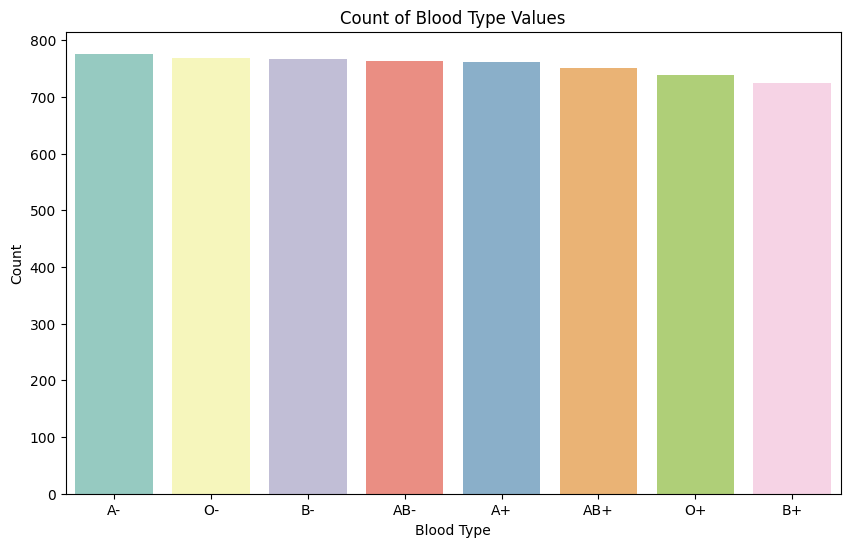

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Blood Type'].value_counts().index,y=data['Blood Type'].value_counts().values,order=data['Blood Type'].value_counts().index.tolist(), palette='Set3')
plt.title('Count of Blood Type Values')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.xticks()
plt.show()

- All **`blood types`** within the dataset are equally represented, showing no dominance or rarity of any specific type over the others.

Exploring the **`diseases or diagnoses`** available within this dataset.

In [ ]:
data["Medical Condition"].unique()

array(['Asthma', nan, 'Arthritis', 'Hypertension', 'Cancer', 'Diabetes',
       'Obesity'], dtype=object)

- Noted that this column exhibited null values that will need handling in preprocessing phase. Additionally, across the other categories, no unexpected diseases were found.

Exploring the Distribution of **`Diseases`** Across the Dataset

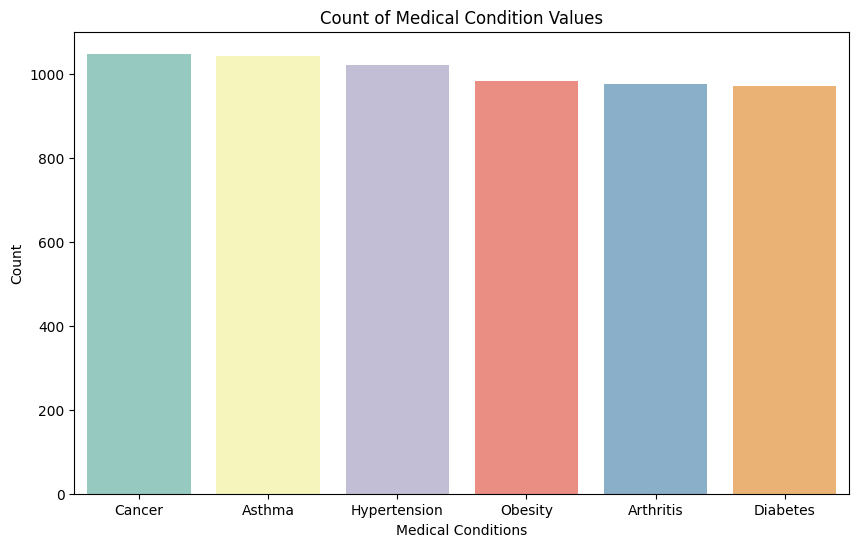

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Medical Condition'].value_counts().index,y=data['Medical Condition'].value_counts().values,order=data['Medical Condition'].value_counts().index.tolist(), palette='Set3')
plt.title('Count of Medical Condition Values')
plt.xlabel('Medical Conditions')
plt.ylabel('Count')
plt.xticks()
plt.show()

- All the available diseases are almost equally distributed, with cancer being the most prevalent among them.


Exploring the distribution of Diseases among different age groups within the dataset.

In [ ]:
counts = data.groupby(['Medical Condition', 'AgeCategory']).size().reset_index(name='Count')

# Create a histogram using Plotly Express with counts on top of each bar
fig = px.bar(counts, x='Medical Condition', y='Count', color='AgeCategory', barmode='group',
             title='Occurrence of Diseases by Age Group', labels={'Medical Condition': 'Medical Condition', 'Count': 'Count'},
             text='Count', color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_traces(textposition='outside')  # Place text labels outside the bars for better visibility
fig.show()

* Teenagers tend to encounter Asthma and Hypertension more frequently compared to other diseases.

* Seniors commonly experience most diseases at similar rates, with Cancer and Asthma being more prevalent.

* Other age groups exhibit a relatively even distribution among all diseases.

Investigating the distribution of Diseases based on Gender.

In [ ]:
grouped_data = data.groupby(['Medical Condition','Gender']).size().unstack()

grouped_data = grouped_data.reset_index()

color_map = {'Male': ' dodgerblue', 'Female': 'lightpink'}

# Melt the DataFrame to a long format for Plotly
grouped_data_melted = grouped_data.melt(id_vars='Medical Condition', var_name='Gender', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(grouped_data_melted, x='Medical Condition', y='Count', color='Gender',
             barmode='group', text='Count', title='Count of Gender of each Disease',color_discrete_map=color_map)


# Update layout and add text annotations on top of each bar
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Medical Condition', yaxis_title='Count', legend_title='Gender',xaxis={'categoryorder': 'category ascending','tickangle': -45})

# Show the plot
fig.show()

* Hypertension appears to be more prevalent among men, potentially due to their increased occupational involvement.
* Women exhibit a higher likelihood of having cancer compared to men, potentially influenced by diseases like breast cancer, which are more frequent among women.


Investigating the distribution of Medical Conditions based on the available Blood Types.

In [ ]:
grouped_data = data.groupby(['Blood Type','Medical Condition']).size().unstack()

grouped_data = grouped_data.reset_index()


# Melt the DataFrame to a long format for Plotly
grouped_data_melted = grouped_data.melt(id_vars='Blood Type', var_name='Medical Condition', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(grouped_data_melted, x='Blood Type', y='Count', color='Medical Condition',
             barmode='group', text='Count', title='Count of Gender of each Disease')


# Update layout and add text annotations on top of each bar
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Blood Type', yaxis_title='Count', legend_title='Medical Condition',xaxis={'categoryorder': 'category ascending','tickangle': 0})

# Show the plot
fig.show()

Displaying the count of unique **`Doctors`** present within the dataset.

In [ ]:
data['Doctor'].nunique()

5825


* There are some repeated instances of certain doctors. This occurrence is expected as doctors often provide treatment to multiple patients, resulting in their recurrent presence in the data.

In [ ]:
data['Hospital'].nunique()

5425

In [ ]:
data['Hospital'].value_counts()

Smith and Sons                12
Smith PLC                     11
Smith Inc                     10
Johnson PLC                    9
Johnson Group                  8
                              ..
Clayton, Anderson and Ho       1
Ford, Vincent and Robinson     1
Harris-Rivera                  1
Aguilar, Hubbard and Glenn     1
Cooper and Sons                1
Name: Hospital, Length: 5425, dtype: int64

Investigating the dataset to identify the Top 10 most frequently occurring hospitals.

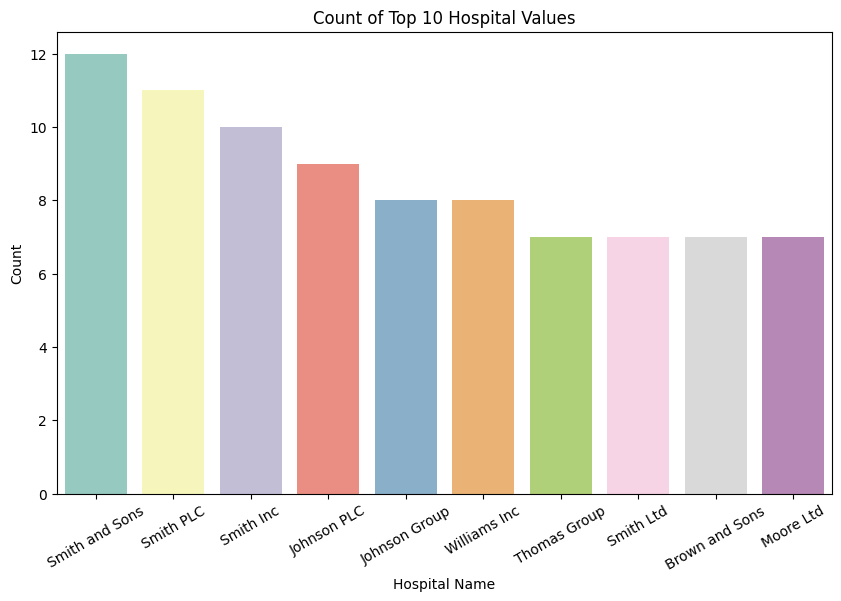

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Hospital'].value_counts().head(10).index,y=data['Hospital'].value_counts().head(10).values,order=data['Hospital'].value_counts().head(10).index.tolist(), palette='Set3')
plt.title('Count of Top 10 Hospital Values')
plt.xlabel('Hospital Name')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


* The presence of these Top 10 frequently occurring hospitals in the dataset might suggest their widespread availability and quality of service across the country

Checking the unique categories present in the **`Insurance Provider`** column to identify any unexpected or irregular entry.

In [ ]:
data['Insurance Provider'].unique()

array(['UnitedHealthcare', 'Medicare', 'Aetna', 'Cigna', 'Blue Cross'],
      dtype=object)

- All **`Insurance Providers`** recorded in the dataset appear to be standard, without any presence of irregular or unexpected entries.

Investigating the presence and distribution of **`Insurance Providers`** within the dataset.

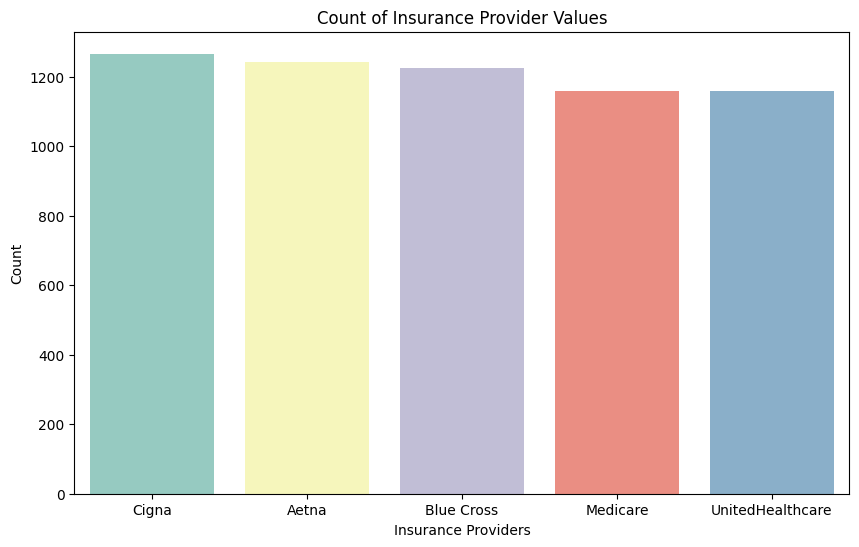

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Insurance Provider'].value_counts().index,y=data['Insurance Provider'].value_counts().values,order=data['Insurance Provider'].value_counts().index.tolist(), palette='Set3')
plt.title('Count of Insurance Provider Values')
plt.xlabel('Insurance Providers')
plt.ylabel('Count')
plt.xticks()
plt.show()

- All the available Insurance Providers are almost equally distributed, with Cigna being the most prevalent among them.

Verifying the count of rows containing errors or incorrect entries in the **`billing amount`** column.

In [ ]:
data[data['Billing Amount'] < 0].shape[0]

4

- In the dataset, there are 4 rows that included negative values for the **`billing amount`**.

To address these errors, we will utilize the absolute function to convert all encountered negative values in this column to their positive counterparts.

In [ ]:
data['Billing Amount']=data["Billing Amount"].apply(lambda x : abs(x) if x<0 else x)

Double-checking the **```Billing Amount```** column to identify any rows that may contain negative values for additional validation.






In [ ]:
data[data['Billing Amount'] < 0].shape[0]

0


* The issue of negative values in the Billing Amount column has been effectively resolved.

Investigating the total Billing Amount associated with each Insurance Provider.

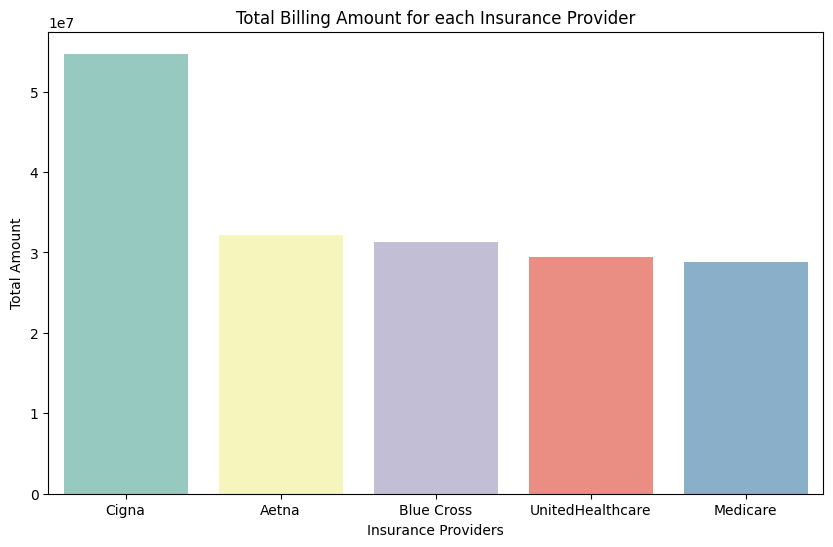

In [ ]:
grouped_data = data.groupby('Insurance Provider')['Billing Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index,y=grouped_data.values,order=grouped_data.index.tolist(), palette='Set3')
plt.title('Total Billing Amount for each Insurance Provider')
plt.xlabel('Insurance Providers')
plt.ylabel('Total Amount')
plt.xticks()
plt.show()

* The total billing amounts for all available **```Insurance Providers```** are mostly equal, except for ***Cigna*** which notably stands out with the highest billing amount. This indicates its popularity and frequent occurrence within the dataset.

Verifying the count of rows containing errors or incorrect entries in the **`room number`** column.

In [ ]:
data[data['Room Number'] < 0].shape[0]

5

- There were 5 rows identified within the **`room number`** column that contained negative values.

Similar to the approach applied to the billing amount column, we will use the absolute function to convert all encountered negative values in this column to positive values.

In [ ]:
data['Room Number'] = data["Room Number"].apply(lambda x : abs(x) if x<0 else x)

Double-checking the **```Room Number```** column to identify any rows that may contain negative values for additional validation.






In [ ]:
data[data['Room Number'] <= 0].shape[0]

0

Displaying the count of unique **`Admission Types`** present within the dataset.

In [ ]:
data['Admission Type'].unique()

array(['Emergency', 'Urgent', 'Elective'], dtype=object)

Exploring the Distribution of **`Admission Types`** Across the Dataset.

In [ ]:
fig=px.pie(names=data['Admission Type'].value_counts().index,values=data['Admission Type'].value_counts().values,title='Percentage for each Admission Type',labels=data['Admission Type'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel2))
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



- The **`Admission Types`** are nearly equal in their presence.


Investigating the relationship between Medical Conditions and Admission Types.

In [ ]:
grouped_data = data.groupby(['Medical Condition','Admission Type']).size().unstack()

grouped_data = grouped_data.reset_index()


# Melt the DataFrame to a long format for Plotly
grouped_data_melted = grouped_data.melt(id_vars='Medical Condition', var_name='Admission Type', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(grouped_data_melted, x='Medical Condition', y='Count', color='Admission Type',
             barmode='group', text='Count', title='Count of Gender of each Disease')


# Update layout and add text annotations on top of each bar
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Medical Condition', yaxis_title='Count', legend_title='Admission Type',xaxis={'categoryorder': 'category ascending','tickangle': 0})

# Show the plot
fig.show()

* Most diseases occur uniformly across all admission types.
* Cancer tends to occur most frequently under emergency admission, which is expected considering its high level of danger.

* Hypertension and Diabetes show a similar trend of higher occurrence in Urgent admissions, implying that individuals seeking treatment for these conditions present urgent cases.

Checking the unique categories present in the **` Medication`** column to identify any unexpected or irregular entry.

In [ ]:
data['Medication'].unique()

array(['Lipitor', 'Penicillin', nan, 'Aspirin', 'Paracetamol',
       'Ibuprofen'], dtype=object)


* Noticed the presence of null values in this column, requiring handling during the preprocessing phase. As for all the other categories, they represent medications without any unexpected entries.

Investigating the presence and distribution of **`Medication `** within the dataset.

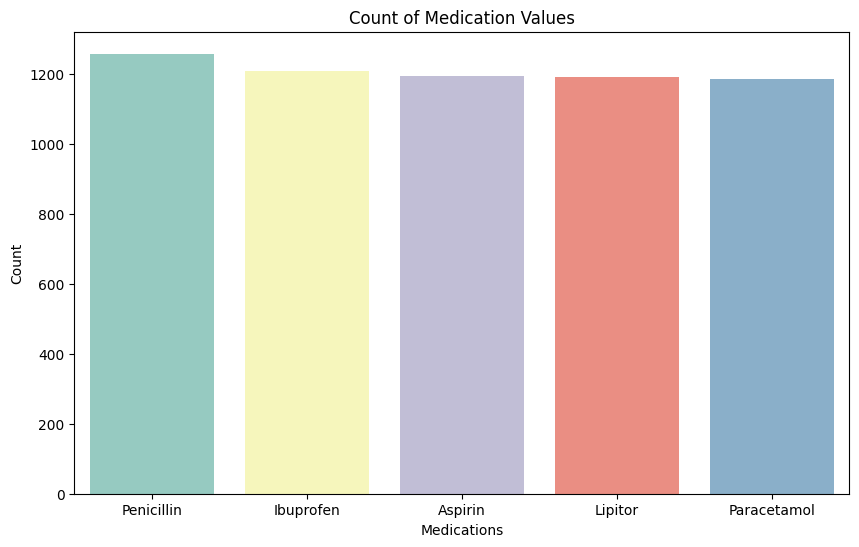

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Medication'].value_counts().index,y=data['Medication'].value_counts().values,order=data['Medication'].value_counts().index.tolist(), palette='Set3')
plt.title('Count of Medication Values')
plt.xlabel('Medications')
plt.ylabel('Count')
plt.xticks()
plt.show()

In [ ]:
grouped_data = data.groupby(['Medical Condition','Medication']).size().unstack()

grouped_data = grouped_data.reset_index()


# Melt the DataFrame to a long format for Plotly
grouped_data_melted = grouped_data.melt(id_vars='Medical Condition', var_name='Medication', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(grouped_data_melted, x='Medical Condition', y='Count', color='Medication',
             barmode='group', text='Count', title='Count of Gender of each Disease')


# Update layout and add text annotations on top of each bar
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Medical Condition', yaxis_title='Count', legend_title='Medication',xaxis={'categoryorder': 'category ascending','tickangle': 0})

# Show the plot
fig.show()


Reviewing the unique values within our target feature **```Test Results```** to identify any anomalies, errors, or unexpected entries

In [ ]:
data['Test Results'].unique()

array(['Normal', 'Abnormal'], dtype=object)

* The only expected entries discovered within the Test Results column are **Normal** and **Abnormal**.


Investigating the distribution of **```Test Results```** between **Normal** and **Abnormal** cases in our dataset.

In [ ]:
fig=px.pie(names=data['Test Results'].value_counts().index,values=data['Test Results'].value_counts().values,title='Percentage for each Test Result',labels=data['Test Results'].value_counts().index)
fig.update_traces(marker=dict(colors=px.colors.qualitative.Pastel))
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.




* Normal and Abnormal cases appear to occur almost equally, with Abnormal cases slightly higher by approximately 3%.


Identifying each medical condition based on test results to distinguish between normal and abnormal cases.

In [ ]:
grouped_data = data.groupby(['Medical Condition','Test Results']).size().unstack()

grouped_data = grouped_data.reset_index()


# Melt the DataFrame to a long format for Plotly
grouped_data_melted = grouped_data.melt(id_vars='Medical Condition', var_name='Test Results', value_name='Count')

# Create a grouped bar plot using Plotly
fig = px.bar(grouped_data_melted, x='Medical Condition', y='Count', color='Test Results',
             barmode='group', text='Count', title='Count of Gender of each Disease')


# Update layout and add text annotations on top of each bar
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Medical Condition', yaxis_title='Count', legend_title='Test Results',xaxis={'categoryorder': 'category ascending','tickangle': 0})

# Show the plot
fig.show()


* Abnormal cases are more frequent within Asthma and Hypertension conditions.
* For all other diseases, an equal occurrence exists between normal and abnormal cases.

Deriving a new feature by computing the duration of a patient's stay in days using the Discharge and Date of Admission columns.

In [ ]:
data['Number of days'] = (data['Discharge Date'] - data['Date of Admission']).dt.days


Investigating the average duration of patient stays for each medical condition.

In [ ]:
data.groupby('Medical Condition')['Number of days'].mean().round()

Medical Condition
Arthritis       16.0
Asthma          15.0
Cancer          15.0
Diabetes        16.0
Hypertension    16.0
Obesity         15.0
Name: Number of days, dtype: float64

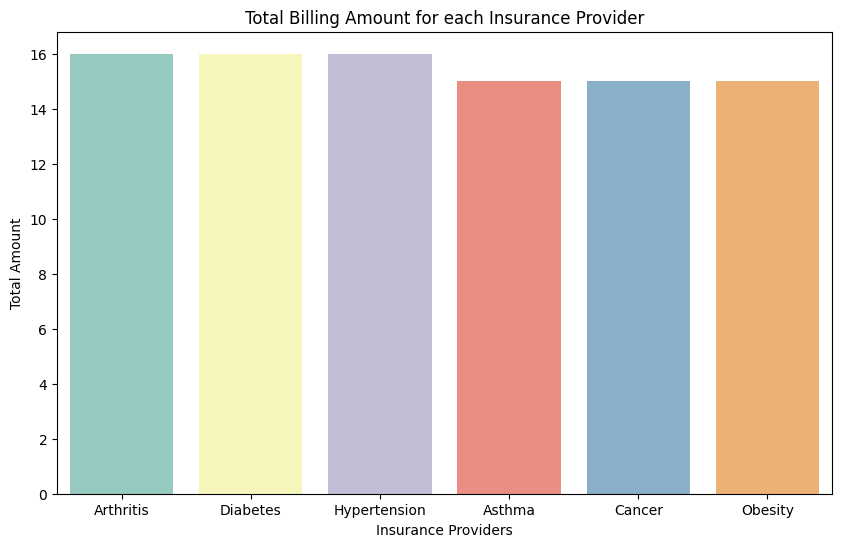

In [ ]:
grouped_data=data.groupby('Medical Condition')['Number of days'].mean().round().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index,y=grouped_data.values,order=grouped_data.index.tolist(), palette='Set3')
plt.title('Total Billing Amount for each Insurance Provider')
plt.xlabel('Medical Codnition')
plt.ylabel('Number of Days')
plt.xticks()
plt.show()

* All diseases exhibit an identical average duration of patient stays, approximately 15 days on average.

## [2] Test Data Overview

In [ ]:
data_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,410,Elective,2019-06-09,Penicillin,Abnormal
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,235,Elective,2019-05-18,Ibuprofen,Abnormal
2,Elizabeth Allen,75,Female,A-,Arthritis,2021-03-30,Yvonne Wilkinson,"Clark, Garcia and Cobb",Blue Cross,47431.905702,-472,Urgent,2021-04-17,NaN,Normal
3,Gregory Martin,26,Female,O+,NaN,2021-07-08,Mrs. Bailey Howard MD,"Rodriguez, Aguilar and Zimmerman",Medicare,29210.176374,126,Emergency,2021-07-15,Aspirin,Abnormal
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,222,Urgent,2021-06-16,Lipitor,Normal


In [ ]:
data_test.shape

(674, 15)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                674 non-null    object 
 1   Age                 674 non-null    int64  
 2   Gender              674 non-null    object 
 3   Blood Type          674 non-null    object 
 4   Medical Condition   668 non-null    object 
 5   Date of Admission   674 non-null    object 
 6   Doctor              674 non-null    object 
 7   Hospital            674 non-null    object 
 8   Insurance Provider  674 non-null    object 
 9   Billing Amount      674 non-null    float64
 10  Room Number         674 non-null    int64  
 11  Admission Type      674 non-null    object 
 12  Discharge Date      674 non-null    object 
 13  Medication          668 non-null    object 
 14  Test Results        674 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 79.1+ K

In [ ]:
data_test['Date of Admission'] = pd.to_datetime(data_test['Date of Admission'])
data_test['Discharge Date'] = pd.to_datetime(data_test['Discharge Date'])

In [ ]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,674.0,52.890208,20.055120,18.0,35.000000,54.000000,71.000000,85.000000
Billing Amount,674.0,25991.460728,14370.869640,0.0,14692.534305,25543.655734,36342.886039,136241.466526
Room Number,674.0,293.594955,125.894461,-476.0,199.000000,293.500000,388.750000,498.000000


In [ ]:
data_test.describe(include='object').T

,count,unique,top,freq
Name,674,671,Michael Parker,2
Gender,674,2,Male,344
Blood Type,674,8,B+,97
Medical Condition,668,6,Obesity,123
Doctor,674,672,Tyler Williams,2
Hospital,674,658,White Ltd,3
Insurance Provider,674,5,UnitedHealthcare,153
Admission Type,674,3,Emergency,233
Medication,668,5,Penicillin,139
Test Results,674,2,Abnormal,357


In [ ]:
data_test['Name'].nunique()

671

In [ ]:
data_test['Name'].value_counts()

Michael Parker      2
James Johnson       2
Scott Smith         2
Jeffrey Maxwell     1
Jennifer Morales    1
                   ..
Sherry Nguyen       1
Phillip Smith       1
Jane Wilson         1
Anthony Thompson    1
Eric King           1
Name: Name, Length: 671, dtype: int64

In [ ]:
data_test[data_test['Name']=='Michael Parker']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
587,Michael Parker,45,Male,B-,Asthma,2023-07-21,Allen Bowers,Edwards Ltd,Aetna,25090.970741,255,Elective,2023-08-17,Ibuprofen,Normal
594,Michael Parker,75,Male,B+,Asthma,2021-01-02,Dustin Hobbs,Serrano Group,Cigna,42473.727572,459,Emergency,2021-01-18,Ibuprofen,Abnormal


In [ ]:
data['Age'].unique()

array([35, 61, 49, 51, 41, 82, 55, 33, 39, 45, 72, 79, 54, 26, 70, 74, 56,
       37, 81, 78, 83, 30, 34, 48, 60, 57, 19, 21, 68, 42, 71, 28, 84, 32,
       66, 43, 69, 27, 73, 67, 80, 44, 38, 85, 64, 47, 59, 65, 46, 40, 36,
       29, 31, 20, 24, 23, 75, 77, 53, 62, 52, 76, 25, 22, 63, 58, 18, 50])

In [ ]:
data_test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data_test['Gender'].value_counts()

Male      344
Female    330
Name: Gender, dtype: int64

In [ ]:
data_test['Blood Type'].unique()

array(['AB-', 'AB+', 'A-', 'O+', 'O-', 'B-', 'A+', 'B+'], dtype=object)

In [ ]:
data_test['Blood Type'].value_counts()

B+     97
B-     95
AB-    86
O-     85
O+     83
AB+    80
A+     77
A-     71
Name: Blood Type, dtype: int64

In [ ]:
data_test["Medical Condition"].unique()

array(['Hypertension', 'Obesity', 'Arthritis', nan, 'Cancer', 'Asthma',
       'Diabetes'], dtype=object)

In [ ]:
data_test["Medical Condition"].value_counts()

Obesity         123
Arthritis       121
Hypertension    111
Diabetes        109
Asthma          108
Cancer           96
Name: Medical Condition, dtype: int64

In [ ]:
data_test['Doctor'].nunique()

672

In [ ]:
data_test['Hospital'].nunique()

658

In [ ]:
data_test['Hospital'].value_counts()

White Ltd                    3
Jones Ltd                    3
Davis LLC                    2
Johnson PLC                  2
Castillo Ltd                 2
                            ..
Munoz Inc                    1
Jones LLC                    1
Murphy LLC                   1
Cochran Group                1
Torres, Young and Stewart    1
Name: Hospital, Length: 658, dtype: int64

In [ ]:
data_test['Insurance Provider'].unique()

array(['Cigna', 'Blue Cross', 'Medicare', 'UnitedHealthcare', 'Aetna'],
      dtype=object)

In [ ]:
data_test['Insurance Provider'].value_counts()

UnitedHealthcare    153
Blue Cross          141
Medicare            130
Aetna               126
Cigna               124
Name: Insurance Provider, dtype: int64

In [ ]:
data_test[data_test['Billing Amount'] < 0].shape[0]

0

In [ ]:
data_test[data_test['Room Number'] < 0].shape[0]

4

In [ ]:
data_test['Room Number']=data_test["Room Number"].apply(lambda x : abs(x) if x<0 else x)

In [ ]:
data_test[data_test['Room Number'] < 0].shape[0]

0

In [ ]:
data_test['Admission Type'].unique()

array(['Elective', 'Urgent', 'Emergency'], dtype=object)

In [ ]:
data_test['Admission Type'].value_counts()

Emergency    233
Elective     221
Urgent       220
Name: Admission Type, dtype: int64

In [ ]:
data_test['Medication'].unique()

array(['Penicillin', 'Ibuprofen', nan, 'Aspirin', 'Lipitor',
       'Paracetamol'], dtype=object)

In [ ]:
data_test['Medication'].value_counts()

Penicillin     139
Aspirin        138
Ibuprofen      136
Lipitor        135
Paracetamol    120
Name: Medication, dtype: int64

In [ ]:
data_test['Test Results'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
data_test['Test Results'].value_counts()

Abnormal    357
Normal      317
Name: Test Results, dtype: int64

In [ ]:
data_test['Number of days'] = (data_test['Discharge Date'] - data_test['Date of Admission']).dt.days

In [ ]:
data.to_csv("formatted_train_data.csv")
data_test.to_csv("formatted_test_data.csv")
